# Function Initialization, Data Preparation

In [215]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
data=pd.read_csv('/content/game_data_teams_regular_season_and_playoffs_2003_2020.csv') 
data.drop('Unnamed: 0', inplace=True, axis=1)

In [216]:
unfinished_season=data.loc[data['SEASON']==2020]
data=data.drop(index=unfinished_season.index)
unfinished_season=data.loc[data['SEASON']==2019]
data=data.drop(index=unfinished_season.index)

In [219]:
import matplotlib.pyplot as plt

In [309]:
data[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]

,H_S_NET_RATING,H_S_PTS,H_S_PTS_A,H_S_AST,H_S_TS,H_S_WP,H_S_WL,H_S_FG3_PCT,H_S_FTR,H_L5_PTS,...,A_S_PTS_A,A_S_AST,A_S_TS,A_S_WP,A_S_WL,A_S_FG3_PCT,A_S_FTR,A_L5_PTS,A_L5_PTS_A,A_L5_NET_RATING
2000,7.719512,105.353659,97.634146,25.170732,0.570873,0.753086,41,0.397098,0.239918,107.2,...,97.439024,22.524390,0.590061,0.666667,35,0.364159,0.300383,97.6,103.2,-5.6
2001,4.756098,102.195122,97.439024,22.524390,0.590061,0.666667,27,0.364159,0.300383,98.4,...,97.634146,25.170732,0.570873,0.753086,33,0.397098,0.239918,109.2,96.2,13.0
2002,4.756098,102.195122,97.439024,22.524390,0.590061,0.666667,27,0.364159,0.300383,100.4,...,97.634146,25.170732,0.570873,0.753086,33,0.397098,0.239918,105.4,98.8,6.6
2003,7.719512,105.353659,97.634146,25.170732,0.570873,0.765432,43,0.397098,0.239918,105.6,...,97.439024,22.524390,0.590061,0.654321,33,0.364159,0.300383,100.6,94.4,6.2
2004,7.719512,105.353659,97.634146,25.170732,0.570873,0.753086,41,0.397098,0.239918,106.0,...,97.439024,22.524390,0.590061,0.666667,35,0.364159,0.300383,99.0,89.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,-18.000000,77.000000,95.000000,13.000000,0.412206,0.000000,-1,0.167000,0.448718,77.0,...,89.000000,23.000000,0.548200,1.000000,1,0.379000,0.252874,106.0,89.0,17.0
22734,-19.000000,94.500000,113.500000,18.000000,0.489232,0.000000,-2,0.304000,0.387879,94.5,...,90.000000,17.000000,0.474490,1.000000,-2,0.233000,0.287356,93.0,90.0,3.0
22735,-17.000000,84.000000,101.000000,17.000000,0.450450,0.000000,-1,0.364000,0.250000,84.0,...,107.000000,20.000000,0.555166,0.000000,-2,0.316000,0.320000,95.0,107.0,-12.0
22736,-4.000000,101.000000,105.000000,20.000000,0.525385,0.000000,-1,0.500000,0.267442,101.0,...,89.000000,15.000000,0.427674,0.000000,0,0.231000,0.226190,79.0,89.0,-10.0


In [310]:
data[['H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]

,H_S_WP,H_S_WL,H_S_NET_RATING,H_S_TS,H_S_TS_A,H_S_EFG,H_S_EFG_A,H_S_PTS,H_S_PTS_A,H_S_AST,...,A_S_TS_A,A_S_EFG,A_S_EFG_A,A_S_PTS,A_S_PTS_A,A_S_AST,A_S_REB,A_S_AST_A,A_S_REB_A,A_S_FTR
2000,0.753086,41,7.719512,0.570873,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,...,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,36.878049,21.353659,40.317073,0.300383
2001,0.666667,27,4.756098,0.590061,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,...,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,43.268293,20.353659,42.219512,0.239918
2002,0.666667,27,4.756098,0.590061,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,...,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,43.268293,20.353659,42.219512,0.239918
2003,0.765432,43,7.719512,0.570873,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,...,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,36.878049,21.353659,40.317073,0.300383
2004,0.753086,41,7.719512,0.570873,0.518521,0.536967,0.481723,105.353659,97.634146,25.170732,...,0.548682,0.553970,0.510888,102.195122,97.439024,22.524390,36.878049,21.353659,40.317073,0.300383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,0.000000,-1,-18.000000,0.412206,0.533229,0.326923,0.480000,77.000000,95.000000,13.000000,...,0.481393,0.511494,0.419753,106.000000,89.000000,23.000000,42.000000,19.000000,43.000000,0.252874
22734,0.000000,-2,-19.000000,0.489232,0.613779,0.415152,0.580645,94.500000,113.500000,18.000000,...,0.562781,0.431034,0.476923,93.000000,90.000000,17.000000,33.000000,23.000000,47.000000,0.287356
22735,0.000000,-1,-17.000000,0.450450,0.440509,0.404762,0.425743,84.000000,101.000000,17.000000,...,0.587138,0.520000,0.537037,95.000000,107.000000,20.000000,36.000000,20.000000,44.000000,0.320000
22736,0.000000,-1,-4.000000,0.525385,0.578194,0.488372,0.548780,101.000000,105.000000,20.000000,...,0.451135,0.404762,0.388235,79.000000,89.000000,15.000000,45.000000,17.000000,51.000000,0.226190


In [311]:
data[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]

,H_L5_WP,H_L5_NET_RATING,H_L5_TS,H_L5_TS_A,H_L5_PTS,H_L5_PTS_A,H_L5_AST,H_L5_REB,H_L5_AST_A,A_L5_WP,A_L5_NET_RATING,A_L5_TS,A_L5_TS_A,A_L5_PTS,A_L5_PTS_A,A_L5_AST,A_L5_REB,A_L5_AST_A
2000,0.8,11.6,0.613947,0.581565,107.2,95.6,24.4,39.6,16.2,0.4,-5.6,0.610488,0.633720,97.6,103.2,17.2,31.4,23.2
2001,0.4,-2.0,0.617470,0.606573,98.4,100.4,19.0,33.6,20.8,0.8,13.0,0.613869,0.571313,109.2,96.2,24.0,40.4,17.4
2002,0.4,4.2,0.612494,0.580637,100.4,96.2,18.8,35.2,20.2,0.8,6.6,0.573674,0.563875,105.4,98.8,23.2,42.8,18.4
2003,0.8,5.2,0.565844,0.553546,105.6,100.4,22.4,42.6,18.6,0.4,6.2,0.617390,0.590886,100.6,94.4,19.0,33.4,18.4
2004,0.8,9.2,0.550936,0.521552,106.0,96.8,21.8,45.4,19.0,0.4,10.0,0.619617,0.544916,99.0,89.0,19.6,35.2,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,0.0,-18.0,0.412206,0.533229,77.0,95.0,13.0,50.0,21.0,1.0,17.0,0.548200,0.481393,106.0,89.0,23.0,42.0,19.0
22734,0.0,-19.0,0.489232,0.613779,94.5,113.5,18.0,37.0,22.5,1.0,3.0,0.474490,0.562781,93.0,90.0,17.0,33.0,23.0
22735,0.0,-17.0,0.450450,0.440509,84.0,101.0,17.0,56.0,20.0,0.0,-12.0,0.555166,0.587138,95.0,107.0,20.0,36.0,20.0
22736,0.0,-4.0,0.525385,0.578194,101.0,105.0,20.0,47.0,21.0,0.0,-10.0,0.427674,0.451135,79.0,89.0,15.0,45.0,17.0


In [312]:
data[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]

,H_S_NET_RATING,H_S_PTS,H_S_PTS_A,H_S_WP,H_S_WL,H_S_AST,H_S_REB,H_S_OREB,H_S_TS,H_S_STL,...,A_L5_REB,A_L5_OREB,A_L5_TS,A_L5_STL,A_L5_BLK,A_L5_AST_A,A_L5_REB_A,A_L5_OREB_A,A_L5_TS_A,A_L5_FTR
2000,7.719512,105.353659,97.634146,0.753086,41,25.170732,43.268293,9.292683,0.570873,7.365854,...,31.4,6.2,0.610488,8.4,2.2,23.2,35.4,7.4,0.633720,0.271709
2001,4.756098,102.195122,97.439024,0.666667,27,22.524390,36.878049,7.646341,0.590061,8.926829,...,40.4,9.4,0.613869,9.6,3.4,17.4,34.6,6.4,0.571313,0.359375
2002,4.756098,102.195122,97.439024,0.666667,27,22.524390,36.878049,7.646341,0.590061,8.926829,...,42.8,10.6,0.573674,8.0,3.0,18.4,37.8,6.4,0.563875,0.317618
2003,7.719512,105.353659,97.634146,0.765432,43,25.170732,43.268293,9.292683,0.570873,7.365854,...,33.4,7.6,0.617390,8.6,2.6,18.4,35.6,8.0,0.590886,0.256831
2004,7.719512,105.353659,97.634146,0.753086,41,25.170732,43.268293,9.292683,0.570873,7.365854,...,35.2,7.4,0.619617,7.2,3.4,16.2,36.0,10.2,0.544916,0.284507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,-18.000000,77.000000,95.000000,0.000000,-1,13.000000,50.000000,15.000000,0.412206,11.000000,...,42.0,13.0,0.548200,4.0,9.0,19.0,43.0,14.0,0.481393,0.252874
22734,-19.000000,94.500000,113.500000,0.000000,-2,18.000000,37.000000,11.500000,0.489232,8.000000,...,33.0,14.0,0.474490,10.0,4.0,23.0,47.0,8.0,0.562781,0.287356
22735,-17.000000,84.000000,101.000000,0.000000,-1,17.000000,56.000000,16.000000,0.450450,5.000000,...,36.0,7.0,0.555166,7.0,2.0,20.0,44.0,12.0,0.587138,0.320000
22736,-4.000000,101.000000,105.000000,0.000000,-1,20.000000,47.000000,19.000000,0.525385,8.000000,...,45.0,8.0,0.427674,4.0,5.0,17.0,51.0,14.0,0.451135,0.226190


In [183]:
def standardPloting(table,table_colors,label,scales):
  plt.bar(['x1','x2','x3','x4'],[table[0],table[2],table[4],table[6]],color=table_colors[0])
  plt.ylabel(label)
  plt.xlabel('MinMaxScaler')
  plt.ylim(scales)
  plt.show()

  plt.bar(['x1','x2','x3','x4'],[table[1],table[3],table[5],table[7]],color=table_colors[1])
  plt.ylabel(label)
  plt.xlabel('StandardScaler')
  plt.ylim(scales)
  plt.show()

  plt.bar(['x1_max','x1_std','x2_max','x2_std','x3_max','x3_std','x4_max','x4_std'],table,color=table_colors)
  plt.ylabel(label)
  plt.xlabel('All data')
  plt.ylim(scales)
  plt.show()

In [323]:
x=data[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']] 
x_next=data[['H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]
x_next1=data[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]
x_next2=data[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]
y=data['HOME_TEAM_WINS']
x=x.to_numpy()
x_next=x_next.to_numpy()
x_next1=x_next1.to_numpy()
x_next2=x_next2.to_numpy()
y=y.to_numpy()
scaler=MinMaxScaler()
scaler2=StandardScaler()
x1=x
x=scaler.fit_transform(x)
x1=scaler2.fit_transform(x1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,random_state=42,test_size=0.1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x1,y,random_state=42,test_size=0.1)
x1_next=x_next
scaler=MinMaxScaler()
scaler2=StandardScaler()
x_next = scaler.fit_transform(x_next)
x1_next = scaler2.fit_transform(x1_next)
x3_train,x3_test,y3_train,y3_test=train_test_split(x_next,y,random_state=42,test_size=0.1)
x4_train,x4_test,y4_train,y4_test=train_test_split(x1_next,y,random_state=42,test_size=0.1)
x1_next1=x_next1
scaler=MinMaxScaler()
scaler2=StandardScaler()
x_next1 = scaler.fit_transform(x_next1)
x1_next1 = scaler2.fit_transform(x1_next1)
x5_train,x5_test,y5_train,y5_test=train_test_split(x_next1,y,random_state=42,test_size=0.1)
x6_train,x6_test,y6_train,y6_test=train_test_split(x1_next1,y,random_state=42,test_size=0.1)
x1_next2=x_next2
scaler=MinMaxScaler()
scaler2=StandardScaler()
x_next2 = scaler.fit_transform(x_next2)
x1_next2 = scaler2.fit_transform(x1_next2)
x7_train,x7_test,y7_train,y7_test=train_test_split(x_next2,y,random_state=42,test_size=0.1)
x8_train,x8_test,y8_train,y8_test=train_test_split(x1_next2,y,random_state=42,test_size=0.1)

In [324]:
x_train=[x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train]
x_test=[x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test]
y_train=[y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train]
y_test=[y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test]
size=8

# K61 Neighboors, function plus results

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K100acc=[0,0,0,0,0,0,0,0]
K100prec=[0,0,0,0,0,0,0,0]
K100recall=[0,0,0,0,0,0,0,0]
K100classification_report=['','','','','','','','']
for i in range(size) :
  knn = KNeighborsClassifier(n_neighbors=61)
  knn.fit(x_train[i], y_train[i])
  y_pred = knn.predict(x_test[i])
  K100acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  K100prec[i]=metrics.precision_score(y_test[i], y_pred)
  K100recall[i]=metrics.recall_score(y_test[i], y_pred)
  K100classification_report[i]=metrics.classification_report(y_test[i], y_pred)
  print("Accuracy:",K100acc[i])
  print("Precision:",K100prec[i])
  print("Recall:",K100recall[i])

Accuracy: 0.6788856304985337
Precision: 0.692929292929293
Recall: 0.8365853658536585
Accuracy: 0.6803519061583577
Precision: 0.6927710843373494
Recall: 0.8414634146341463
Accuracy: 0.6720430107526881
Precision: 0.690006798096533
Recall: 0.8252032520325203
Accuracy: 0.6705767350928641
Precision: 0.6870794078061911
Recall: 0.8300813008130081
Accuracy: 0.626099706744868
Precision: 0.647431832593532
Recall: 0.8300813008130081
Accuracy: 0.6280547409579668
Precision: 0.647763074984247
Recall: 0.8357723577235773
Accuracy: 0.6637341153470185
Precision: 0.6821236559139785
Recall: 0.8252032520325203
Accuracy: 0.6686217008797654
Precision: 0.684
Recall: 0.8341463414634146


In [48]:
for i in range(size) :
  print(K100classification_report[i])

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       816
           1       0.69      0.83      0.76      1230

    accuracy                           0.68      2046
   macro avg       0.66      0.64      0.64      2046
weighted avg       0.67      0.68      0.66      2046

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       816
           1       0.69      0.84      0.76      1230

    accuracy                           0.68      2046
   macro avg       0.67      0.64      0.64      2046
weighted avg       0.67      0.68      0.66      2046

              precision    recall  f1-score   support

           0       0.64      0.46      0.54       816
           1       0.70      0.83      0.76      1230

    accuracy                           0.68      2046
   macro avg       0.67      0.65      0.65      2046
weighted avg       0.68      0.68      0.67      2046

              preci

In [49]:
print(K100acc)

[0.6774193548387096, 0.678396871945259, 0.6842619745845552, 0.6739980449657869, 0.626099706744868, 0.6280547409579668, 0.679863147605083, 0.6730205278592375]


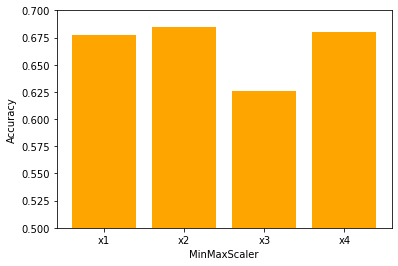

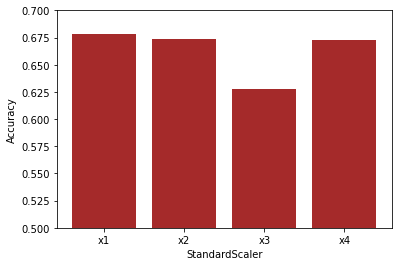

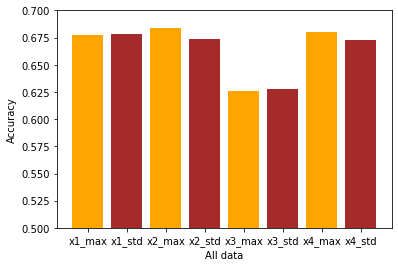

In [50]:
standardPloting(K100acc,['orange','brown'],'Accuracy',[0.5,0.7])

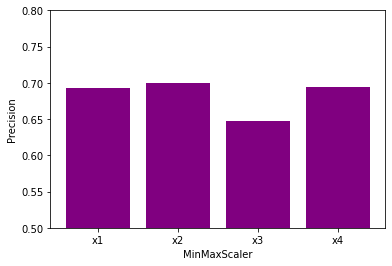

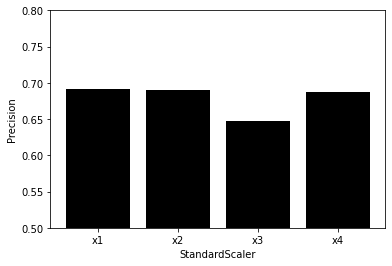

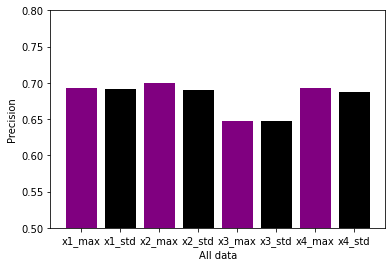

In [51]:
standardPloting(K100prec,['purple','black'],'Precision',[0.5,0.8])

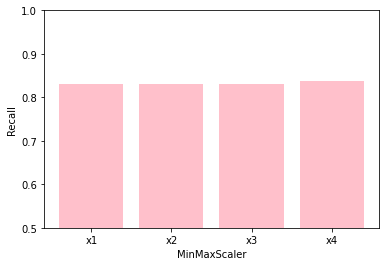

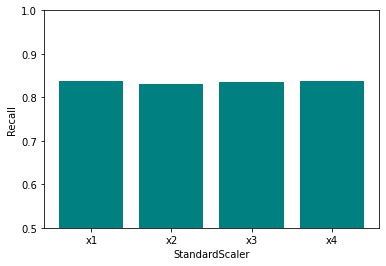

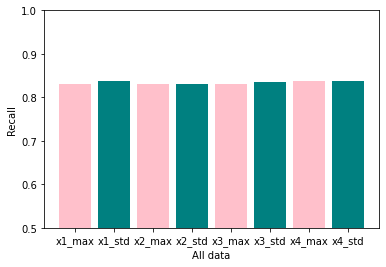

In [52]:
standardPloting(K100recall,['pink','teal'],'Recall',[0.5,1])

# Neural Network with SGD,ADAM and ADAMAX optimizers, functions and results

In [225]:
import tensorflow as tf

In [321]:
neural_network_acc=[[],[],[],[],[],[],[],[]]
neural_network_precision=[[],[],[],[],[],[],[],[]]
neural_network_recall=[[],[],[],[],[],[],[],[]]
neural_network_classification_report=[[],[],[],[],[],[],[],[]]

In [ ]:
for j in range(8) :
  opt=['adam','sgd','adamax']
  epoch=[30]
  results_accuracy=[0,0,0]
  results_precision=[0,0,0]
  results_recall=[0,0,0]
  results_classification=['','','']


  b=0
  for i in opt :
    for k in epoch :
      model3 = tf.keras.models.Sequential([
       tf.keras.layers.Dense(64, activation='softmax'),
        tf.keras.layers.Dense(128, activation='elu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64, activation='elu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax'),

        tf.keras.layers.Dense(2)
      ])
      loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
      model3.compile(optimizer=i,
                loss=loss_fn,
                metrics=['accuracy'])
      model3.fit(x_train[j], y_train[j], epochs=k,batch_size=32)
      result=model3.predict(x_test[j])
      size_predict=len(y_test[j])
      results=np.zeros(size_predict)
      for count in range(size_predict):
        if result[count,0]>result[count,1]:
          results[count]=0
        else :
          results[count]=1
      y_pred=results
      acc=metrics.accuracy_score(y_test[j], y_pred)
      prec=metrics.precision_score(y_test[j], y_pred)
      rec=metrics.recall_score(y_test[j], y_pred)
      classi=metrics.classification_report(y_test[j], y_pred)
      results_accuracy[b]=acc
      results_precision[b]=prec
      results_recall[b]=rec
      results_classification[b]=classi
      b=b+1
      print(i)
      print(k)
  neural_network_acc[j]=results_accuracy
  neural_network_precision[j]=results_precision
  neural_network_recall[j]=results_recall
  neural_network_classification_report[j]=results_classification
print(neural_network_acc)

In [298]:
for i in range(size):
  for j in range(3): 
    if i < 2 :
      print('x')
    elif i < 4 :
      print('x1')
    elif i < 6 :
      print('x2') 
    else :
      print('x3')
    if j < 2 :
      print('adam')
    elif j < 4 :
      print('sgd')
    elif j < 6 :
      print('adamax') 
    print('Accuracy:',neural_network_acc[i][j])
    print('Precision:',neural_network_precision[i][j])
    print('Recall:',neural_network_recall[i][j])

x
adam
Accuracy: 0.6984359726295211
Precision: 0.7118175535590877
Recall: 0.8373983739837398
x
adam
Accuracy: 0.6011730205278593
Precision: 0.6011730205278593
Recall: 1.0
x
sgd
Accuracy: 0.6847507331378299
Precision: 0.725520431765613
Recall: 0.765040650406504
x
adam
Accuracy: 0.7976539589442815
Precision: 0.8715846994535519
Recall: 0.7780487804878049
x
adam
Accuracy: 0.6827956989247311
Precision: 0.7067615658362989
Recall: 0.8073170731707318
x
sgd
Accuracy: 0.7903225806451613
Precision: 0.8232445520581114
Recall: 0.8292682926829268
x1
adam
Accuracy: 0.6011730205278593
Precision: 0.6011730205278593
Recall: 1.0
x1
adam
Accuracy: 0.6011730205278593
Precision: 0.6011730205278593
Recall: 1.0
x1
sgd
Accuracy: 0.6774193548387096
Precision: 0.6796973518284993
Recall: 0.8764227642276423
x1
adam
Accuracy: 0.8098729227761485
Precision: 0.8530646515533166
Recall: 0.8260162601626017
x1
adam
Accuracy: 0.6827956989247311
Precision: 0.6922567835870285
Recall: 0.8504065040650407
x1
sgd
Accuracy: 0.801

In [299]:
for i in range(size):
  for j in range(3): 
    if i < 2 :
      print('x')
    elif i < 4 :
      print('x1')
    elif i < 6 :
      print('x2') 
    else :
      print('x3')
    if j < 2 :
      print('adam')
    elif j < 4 :
      print('sgd')
    elif j < 6 :
      print('adamax') 
    print('Classification:',neural_network_classification_report[i][j])

x
adam
Classification:               precision    recall  f1-score   support

           0       0.67      0.49      0.56       816
           1       0.71      0.84      0.77      1230

    accuracy                           0.70      2046
   macro avg       0.69      0.66      0.67      2046
weighted avg       0.69      0.70      0.69      2046

x
adam
Classification:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       816
           1       0.60      1.00      0.75      1230

    accuracy                           0.60      2046
   macro avg       0.30      0.50      0.38      2046
weighted avg       0.36      0.60      0.45      2046

x
sgd
Classification:               precision    recall  f1-score   support

           0       0.61      0.56      0.59       816
           1       0.73      0.77      0.74      1230

    accuracy                           0.68      2046
   macro avg       0.67      0.66      0.67      2046
weight

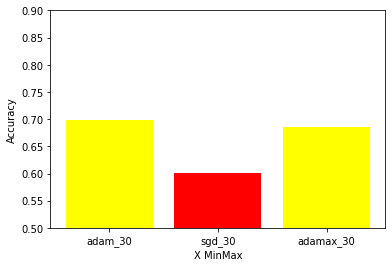

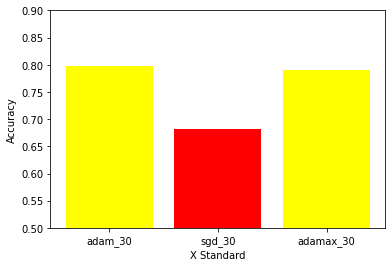

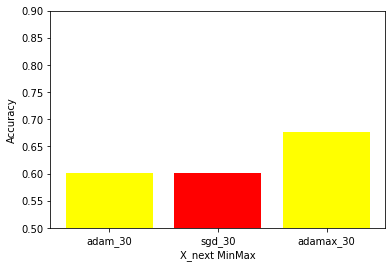

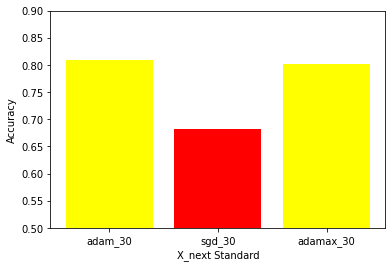

In [300]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[0],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[1],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[2],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[3],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next Standard')
plt.ylim([0.5,0.9])
plt.show()

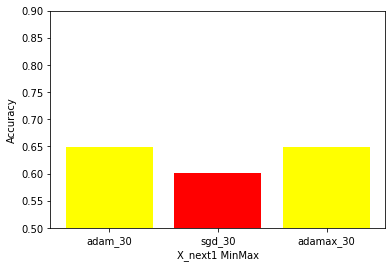

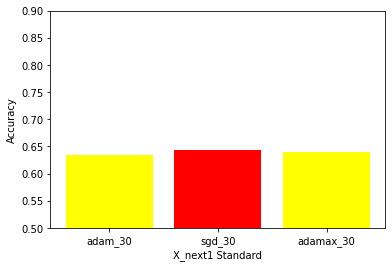

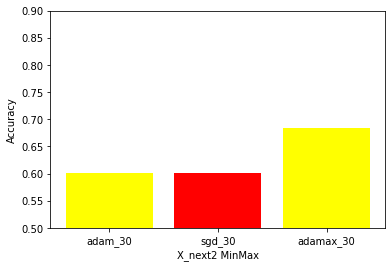

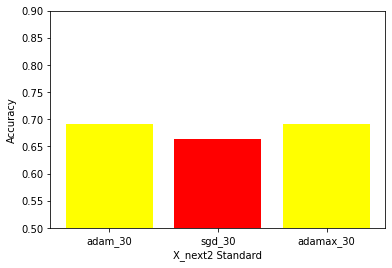

In [301]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[4],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next1 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[5],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next1 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[6],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next2 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[7],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X_next2 Standard')
plt.ylim([0.5,0.9])
plt.show()

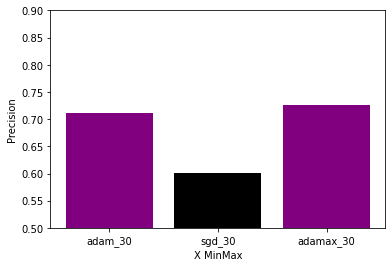

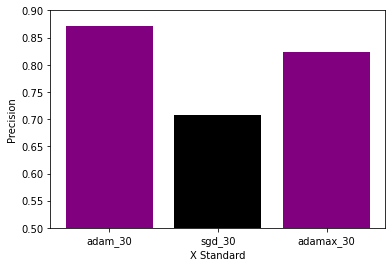

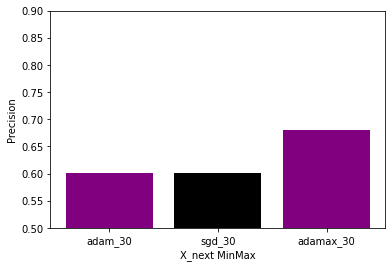

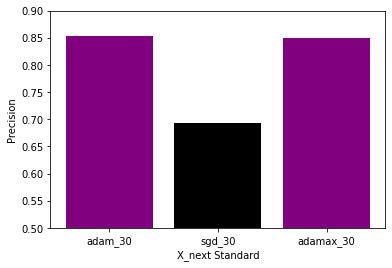

In [302]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[0],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[1],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[2],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[3],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next Standard')
plt.ylim([0.5,0.9])
plt.show()

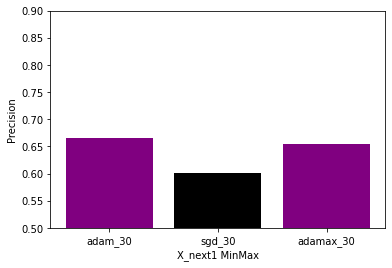

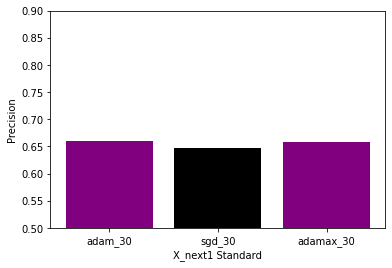

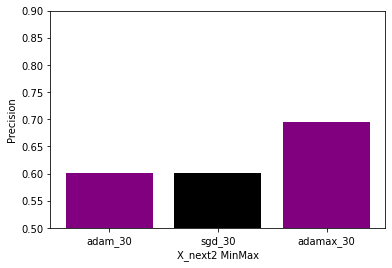

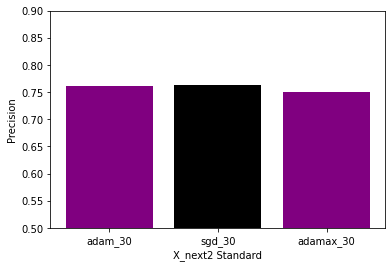

In [303]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[4],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next1 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[5],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next1 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[6],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next2 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[7],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X_next2 Standard')
plt.ylim([0.5,0.9])
plt.show()

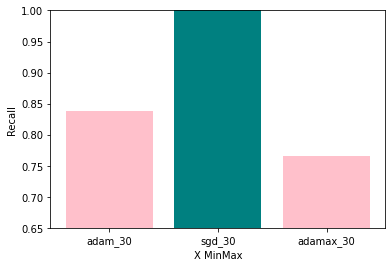

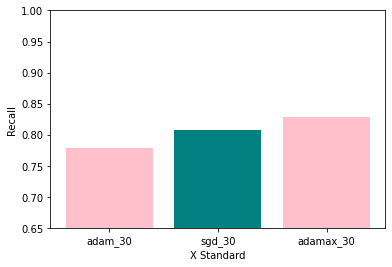

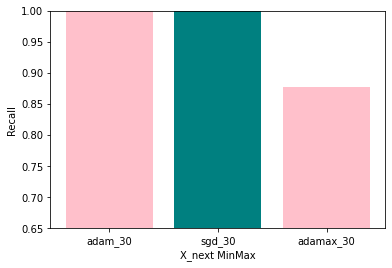

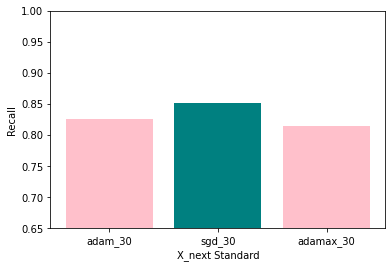

In [304]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[0],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X MinMax')
plt.ylim([0.65,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[1],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X Standard')
plt.ylim([0.65,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[2],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next MinMax')
plt.ylim([0.65,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[3],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next Standard')
plt.ylim([0.65,1])
plt.show()

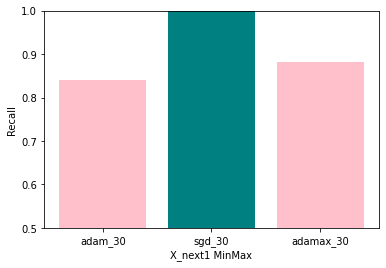

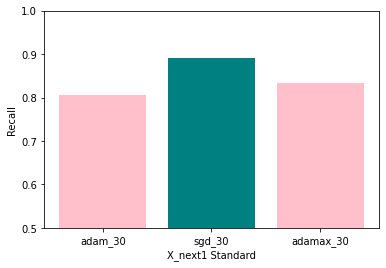

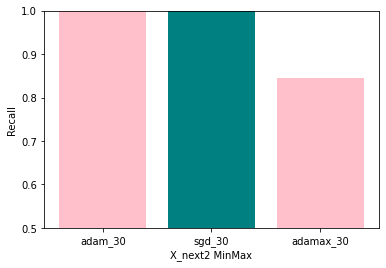

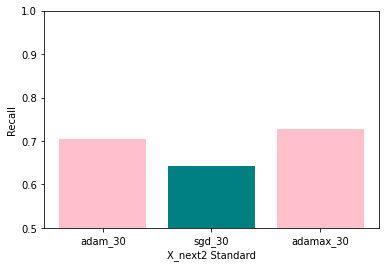

In [305]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[4],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next1 MinMax')
plt.ylim([0.5,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[5],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next1 Standard')
plt.ylim([0.5,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[6],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next2 MinMax')
plt.ylim([0.5,1])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[7],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X_next2 Standard')
plt.ylim([0.5,1])
plt.show()

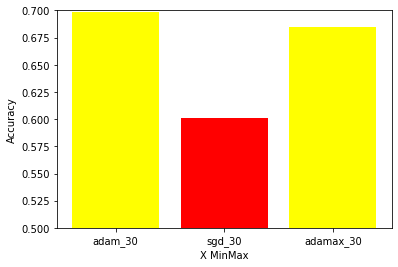

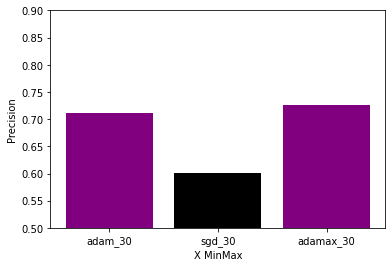

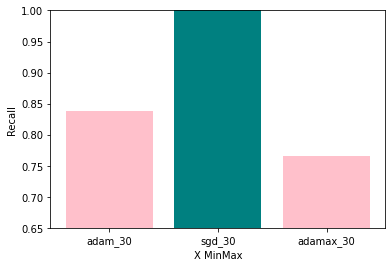

In [306]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[0],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[0],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[0],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X MinMax')
plt.ylim([0.65,1])
plt.show()


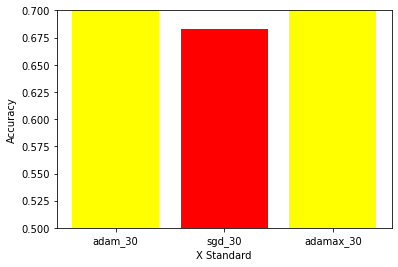

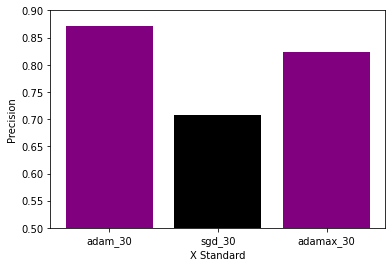

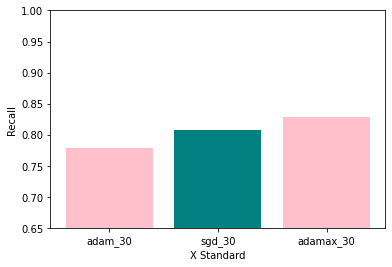

In [307]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[1],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[1],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[1],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X Standard')
plt.ylim([0.65,1])
plt.show()

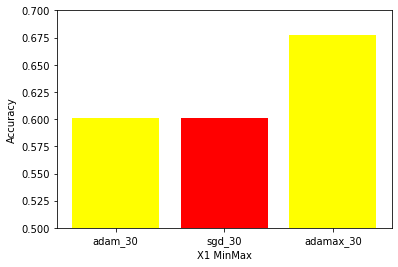

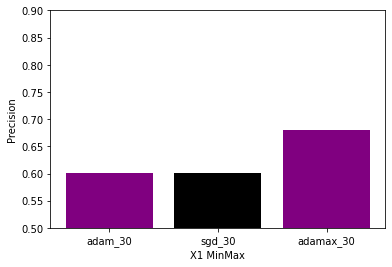

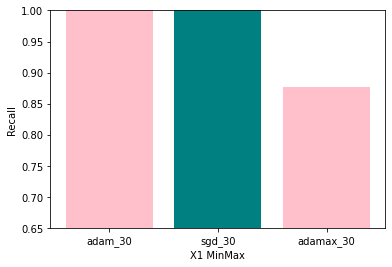

In [308]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[2],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X1 MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[2],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X1 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[2],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X1 MinMax')
plt.ylim([0.65,1])
plt.show()


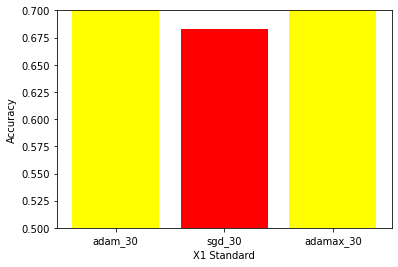

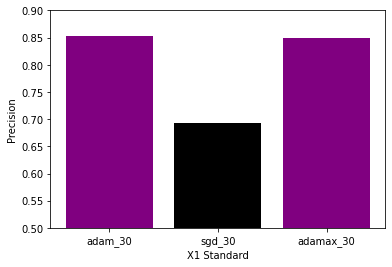

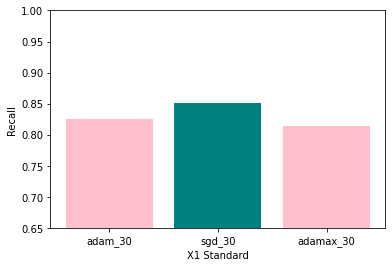

In [239]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[3],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X1 Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[3],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X1 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[3],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X1 Standard')
plt.ylim([0.65,1])
plt.show()

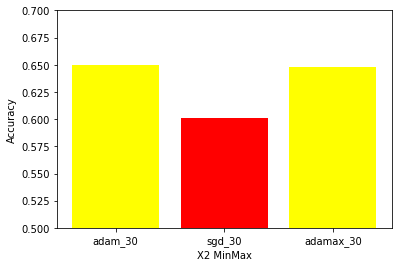

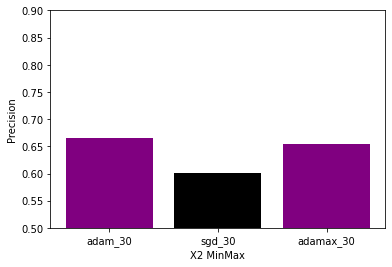

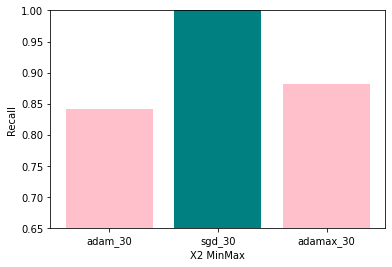

In [240]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[4],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X2 MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[4],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X2 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[4],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X2 MinMax')
plt.ylim([0.65,1])
plt.show()

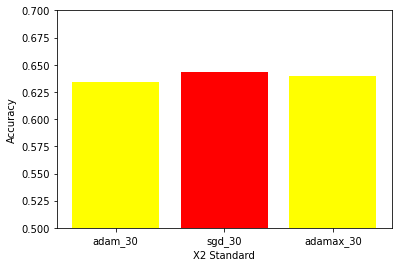

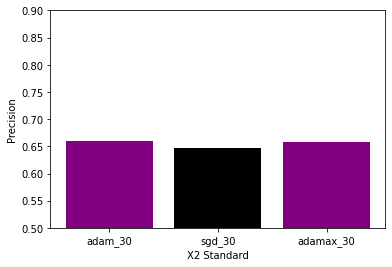

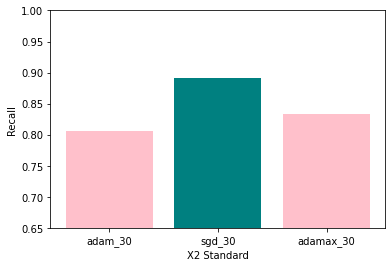

In [241]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[5],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X2 Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[5],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X2 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[5],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X2 Standard')
plt.ylim([0.65,1])
plt.show()

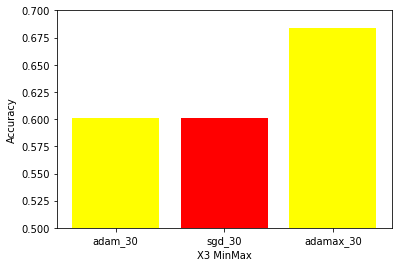

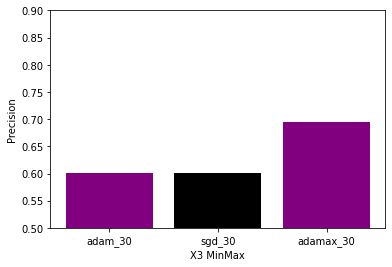

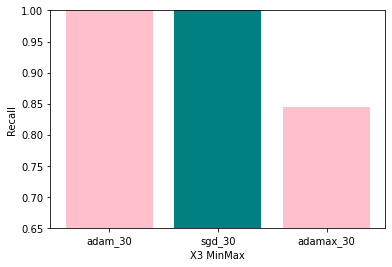

In [242]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[6],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X3 MinMax')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[6],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X3 MinMax')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[6],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X3 MinMax')
plt.ylim([0.65,1])
plt.show()

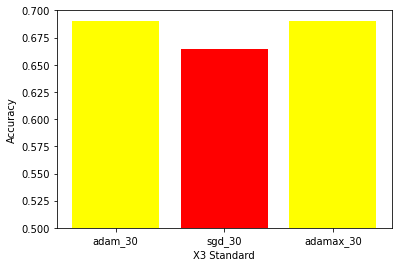

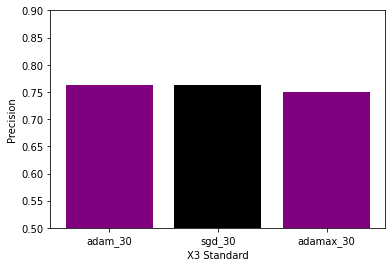

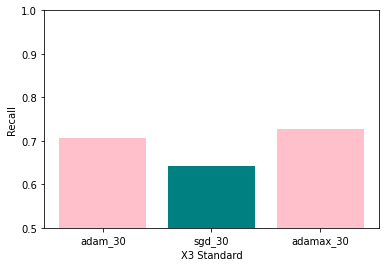

In [243]:
plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_acc[7],color=['yellow','red'])
plt.ylabel('Accuracy')
plt.xlabel('X3 Standard')
plt.ylim([0.5,0.7])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_precision[7],color=['purple','black'])
plt.ylabel('Precision')
plt.xlabel('X3 Standard')
plt.ylim([0.5,0.9])
plt.show()

plt.bar(['adam_30','sgd_30','adamax_30'],neural_network_recall[7],color=['pink','teal'])
plt.ylabel('Recall')
plt.xlabel('X3 Standard')
plt.ylim([0.5,1])
plt.show()

# Decision Tree and Random Forest, function and results

In [325]:
from sklearn.tree import DecisionTreeRegressor 
tree_acc=[0,0,0,0,0,0,0,0]
tree_prec=[0,0,0,0,0,0,0,0]
tree_recall=[0,0,0,0,0,0,0,0]
tree_classification=['','','','','','','','']
for j in range(8) :
  regressor = DecisionTreeRegressor(random_state = 42,max_depth=5) 
  regressor.fit(x_train[j], y_train[j])
  y_pred_tree = regressor.predict(x_test[j])
  length=len(y_test[j])
  length2=len(y_pred_tree)
  y_results=np.zeros(length2)
  for i in range(length) :
    if y_pred_tree[i] > 0.5 : 
     y_results[i]=1
  tree_acc[j]=metrics.accuracy_score(y_test[j], y_results)
  tree_prec[j]=metrics.precision_score(y_test[j], y_results)
  tree_recall[j]=metrics.recall_score(y_test[j], y_results)
  tree_classification[j]=metrics.classification_report(y_test[j], y_results)

In [326]:
print(tree_acc)

[0.7082111436950147, 0.7082111436950147, 0.7082111436950147, 0.7082111436950147, 0.6451612903225806, 0.6451612903225806, 0.7082111436950147, 0.7082111436950147]


In [327]:
print(tree_prec)

[0.7406844106463878, 0.7406844106463878, 0.7406844106463878, 0.7406844106463878, 0.6510791366906474, 0.6510791366906474, 0.7406844106463878, 0.7406844106463878]


In [328]:
print(tree_recall)

[0.791869918699187, 0.791869918699187, 0.791869918699187, 0.791869918699187, 0.8829268292682927, 0.8829268292682927, 0.791869918699187, 0.791869918699187]


In [329]:
print(tree_acc)

[0.7082111436950147, 0.7082111436950147, 0.7082111436950147, 0.7082111436950147, 0.6451612903225806, 0.6451612903225806, 0.7082111436950147, 0.7082111436950147]


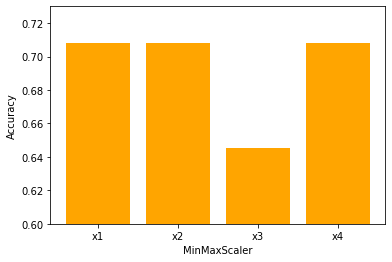

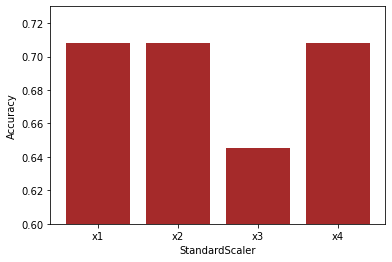

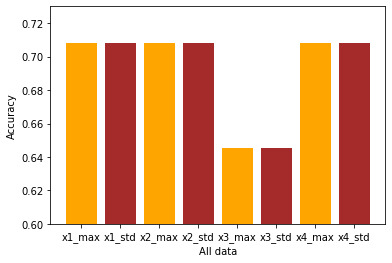

In [330]:
standardPloting(tree_acc,['orange','brown'],'Accuracy',[0.6,0.73])

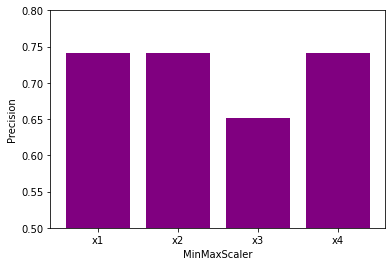

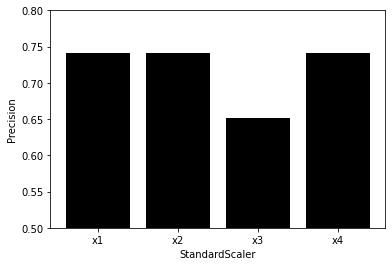

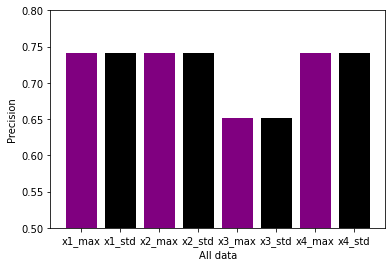

In [331]:
standardPloting(tree_prec,['purple','black'],'Precision',[0.5,0.8])

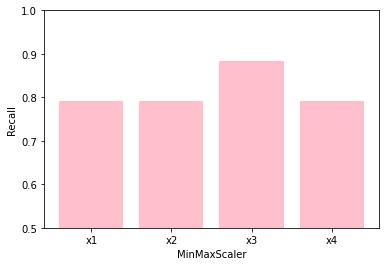

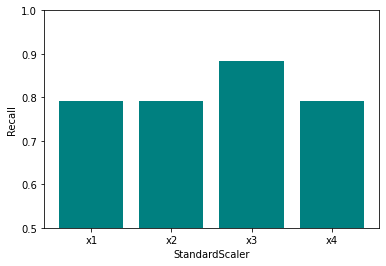

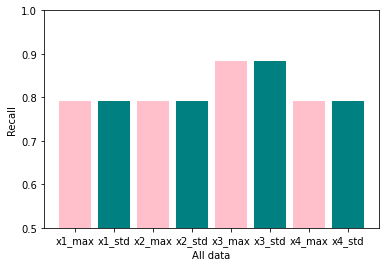

In [332]:
standardPloting(tree_recall,['pink','teal'],'Recall',[0.5,1])

In [333]:
for i in range(size):
  print(tree_classification[i])

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       816
           1       0.74      0.79      0.77      1230

    accuracy                           0.71      2046
   macro avg       0.70      0.69      0.69      2046
weighted avg       0.70      0.71      0.71      2046

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       816
           1       0.74      0.79      0.77      1230

    accuracy                           0.71      2046
   macro avg       0.70      0.69      0.69      2046
weighted avg       0.70      0.71      0.71      2046

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       816
           1       0.74      0.79      0.77      1230

    accuracy                           0.71      2046
   macro avg       0.70      0.69      0.69      2046
weighted avg       0.70      0.71      0.71      2046

              preci

In [334]:
from sklearn.ensemble import RandomForestClassifier
forest_acc=[0,0,0,0,0,0,0,0]
forest_prec=[0,0,0,0,0,0,0,0]
forest_recall=[0,0,0,0,0,0,0,0]
forest_classification=['','','','','','','','']
for j in range(8) :
  clf = RandomForestClassifier(n_estimators = 100) 
  clf.fit(x_train[j], y_train[j])
  y_pred = clf.predict(x_test[j])
  length=len(y_test[j])
  y_results=np.zeros(length)
  for i in range(length) :
    if y_pred[i] > 0.5 : 
     y_results[i]=1
  forest_acc[j]=metrics.accuracy_score(y_test[j], y_results)
  forest_prec[j]=metrics.precision_score(y_test[j], y_results)
  forest_recall[j]=metrics.recall_score(y_test[j], y_results)
  forest_classification[j]=metrics.classification_report(y_test[j], y_results)

In [335]:
print(forest_acc)

[0.7199413489736071, 0.7223851417399805, 0.7155425219941349, 0.7194525904203324, 0.6295210166177908, 0.6217008797653959, 0.6959921798631477, 0.6925708699902249]


In [336]:
print(forest_prec)

[0.7338078291814947, 0.7354196301564723, 0.7330935251798562, 0.7380261248185777, 0.656498673740053, 0.6505944517833554, 0.7096551724137931, 0.7102869139258222]


In [337]:
print(forest_recall)

[0.8382113821138212, 0.8406504065040651, 0.8284552845528456, 0.8268292682926829, 0.8048780487804879, 0.8008130081300813, 0.8365853658536585, 0.8252032520325203]


In [338]:
print(forest_acc)

[0.7199413489736071, 0.7223851417399805, 0.7155425219941349, 0.7194525904203324, 0.6295210166177908, 0.6217008797653959, 0.6959921798631477, 0.6925708699902249]


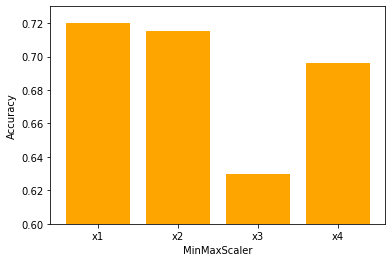

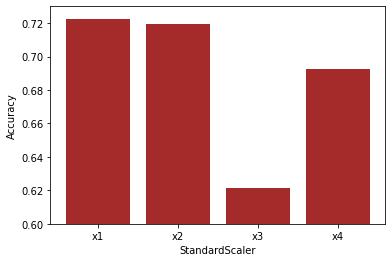

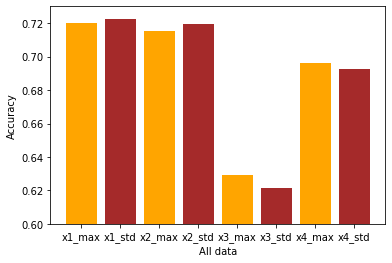

In [339]:
standardPloting(forest_acc,['orange','brown'],'Accuracy',[0.6,0.73])

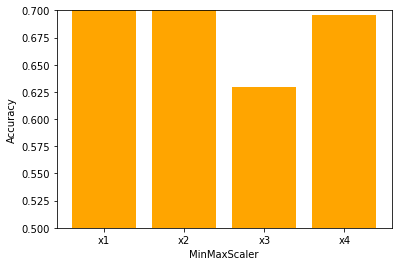

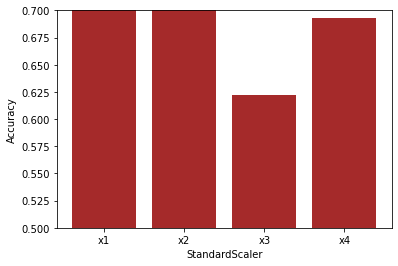

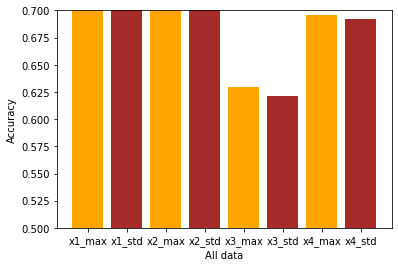

In [340]:
standardPloting(forest_acc,['orange','brown'],'Accuracy',[0.5,0.7])

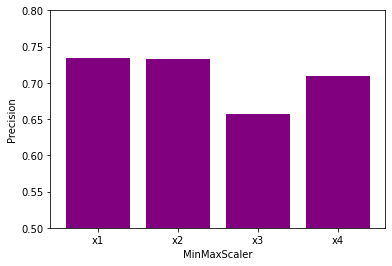

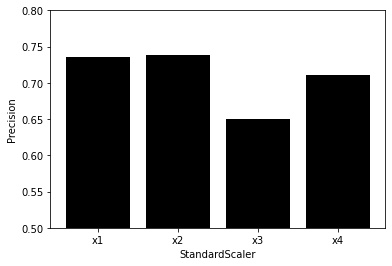

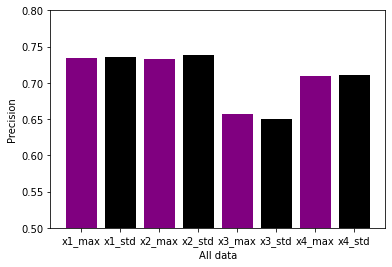

In [341]:
standardPloting(forest_prec,['purple','black'],'Precision',[0.5,0.8])

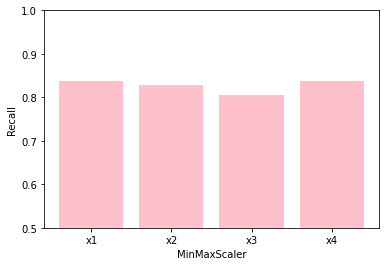

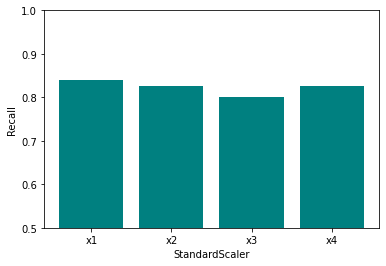

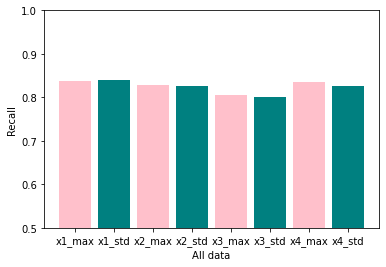

In [342]:
standardPloting(forest_recall,['pink','teal'],'Recall',[0.5,1])

In [343]:
for i in range(size) :
  print(forest_classification[i])

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       816
           1       0.73      0.84      0.78      1230

    accuracy                           0.72      2046
   macro avg       0.71      0.69      0.69      2046
weighted avg       0.72      0.72      0.71      2046

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       816
           1       0.74      0.84      0.78      1230

    accuracy                           0.72      2046
   macro avg       0.71      0.69      0.70      2046
weighted avg       0.72      0.72      0.71      2046

              precision    recall  f1-score   support

           0       0.68      0.55      0.60       816
           1       0.73      0.83      0.78      1230

    accuracy                           0.72      2046
   macro avg       0.71      0.69      0.69      2046
weighted avg       0.71      0.72      0.71      2046

              preci

# SVM Linear, Poly and RBF kernels,function and results

In [349]:
from sklearn import svm


In [350]:
linear_acc=[0,0,0,0,0,0,0,0]
linear_prec=[0,0,0,0,0,0,0,0]
linear_recall=[0,0,0,0,0,0,0,0]
linear_classification=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='linear')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  linear_acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  linear_prec[i]=metrics.precision_score(y_test[i], y_pred)
  linear_recall[i]=metrics.recall_score(y_test[i], y_pred)
  linear_classification[i]=metrics.classification_report(y_test[i], y_pred)

In [351]:
print(linear_acc)

[0.696969696969697, 0.7013685239491692, 0.6935483870967742, 0.695503421309873, 0.6441837732160313, 0.6436950146627566, 0.7028347996089932, 0.706256109481916]


In [352]:
print(linear_prec)

[0.702523240371846, 0.7070234113712375, 0.699536730641959, 0.7000659195781147, 0.6440872560275546, 0.645049218297626, 0.7078877005347594, 0.7106496985934361]


In [353]:
print(linear_recall)

[0.8601626016260162, 0.859349593495935, 0.859349593495935, 0.8634146341463415, 0.9121951219512195, 0.9056910569105691, 0.8609756097560975, 0.8626016260162601]


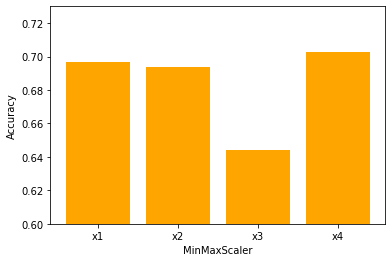

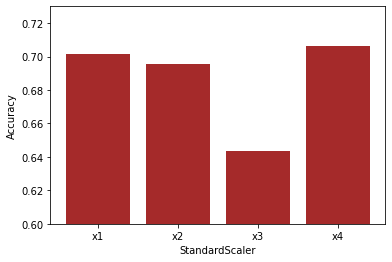

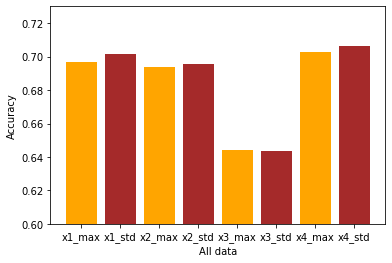

In [354]:
standardPloting(linear_acc,['orange','brown'],'Accuracy',[0.60,0.73])

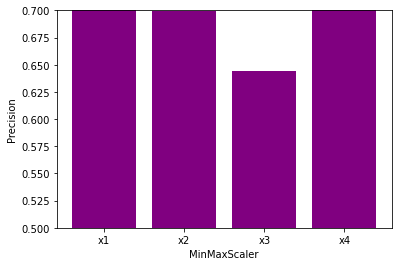

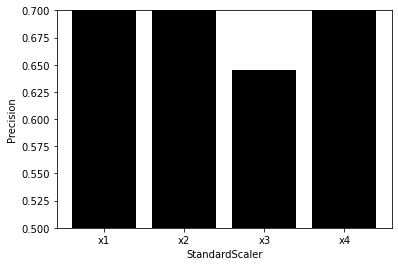

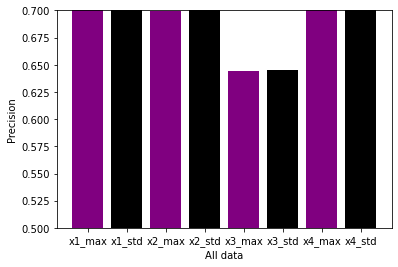

In [355]:
standardPloting(linear_prec,['purple','black'],'Precision',[0.5,0.7])

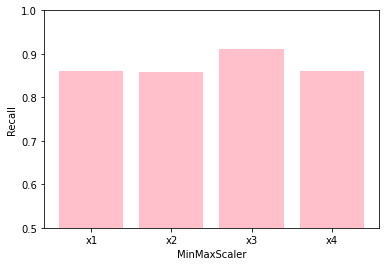

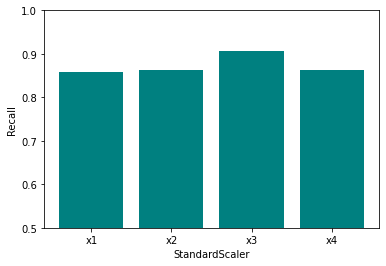

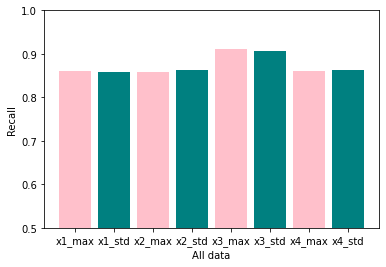

In [356]:
standardPloting(linear_recall,['pink','teal'],'Recall',[0.5,1])

In [357]:
for i in range(size) :
  print(linear_classification[i])

              precision    recall  f1-score   support

           0       0.68      0.45      0.54       816
           1       0.70      0.86      0.77      1230

    accuracy                           0.70      2046
   macro avg       0.69      0.66      0.66      2046
weighted avg       0.69      0.70      0.68      2046

              precision    recall  f1-score   support

           0       0.69      0.46      0.55       816
           1       0.71      0.86      0.78      1230

    accuracy                           0.70      2046
   macro avg       0.70      0.66      0.66      2046
weighted avg       0.70      0.70      0.69      2046

              precision    recall  f1-score   support

           0       0.68      0.44      0.54       816
           1       0.70      0.86      0.77      1230

    accuracy                           0.69      2046
   macro avg       0.69      0.65      0.65      2046
weighted avg       0.69      0.69      0.68      2046

              preci

In [358]:
print(linear_acc)

[0.696969696969697, 0.7013685239491692, 0.6935483870967742, 0.695503421309873, 0.6441837732160313, 0.6436950146627566, 0.7028347996089932, 0.706256109481916]


In [359]:
poly_acc=[0,0,0,0,0,0,0,0]
poly_prec=[0,0,0,0,0,0,0,0]
poly_recall=[0,0,0,0,0,0,0,0]
poly_classification=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='poly')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  poly_acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  poly_prec[i]=metrics.precision_score(y_test[i], y_pred)
  poly_recall[i]=metrics.recall_score(y_test[i], y_pred)
  poly_classification[i]=metrics.classification_report(y_test[i], y_pred)

In [360]:
print(poly_acc)

[0.7233626588465298, 0.695503421309873, 0.7390029325513197, 0.6852394916911045, 0.6402737047898338, 0.6197458455522972, 0.6999022482893451, 0.676930596285435]


In [361]:
print(poly_prec)

[0.7240215924426451, 0.6773816481589714, 0.738030095759234, 0.6678121420389461, 0.6382978723404256, 0.6174636174636174, 0.7203147353361946, 0.6768178993163455]


In [362]:
print(poly_recall)

[0.8723577235772357, 0.9422764227642276, 0.8772357723577235, 0.9479674796747968, 0.926829268292683, 0.9658536585365853, 0.8186991869918699, 0.8853658536585366]


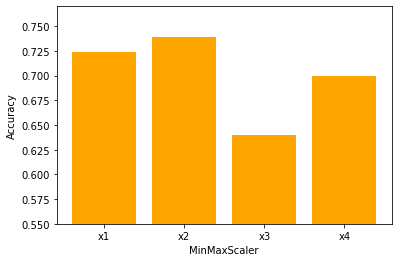

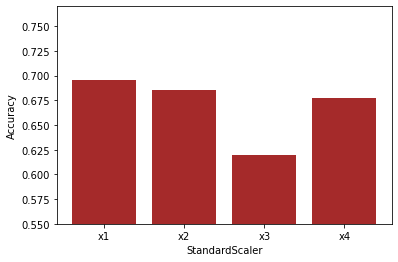

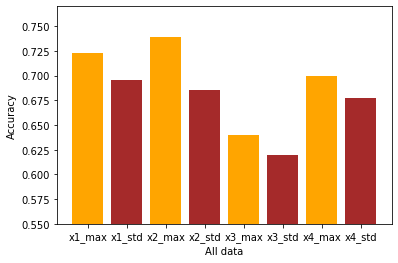

In [363]:
standardPloting(poly_acc,['orange','brown'],'Accuracy',[0.55,0.77])

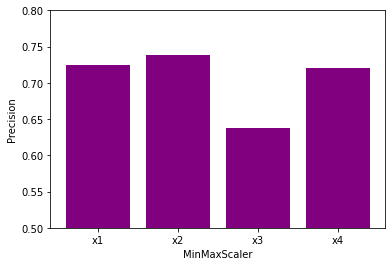

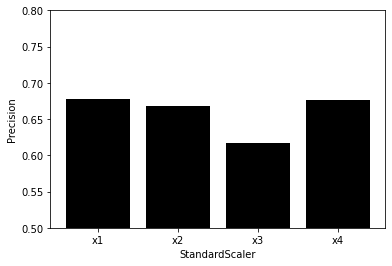

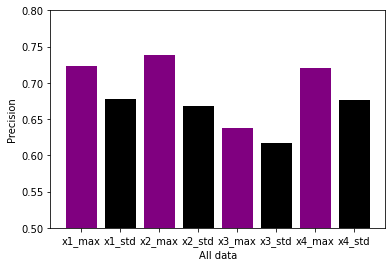

In [364]:
standardPloting(poly_prec,['purple','black'],'Precision',[0.5,0.8])

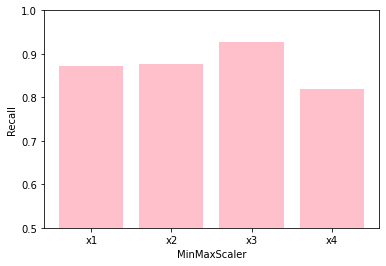

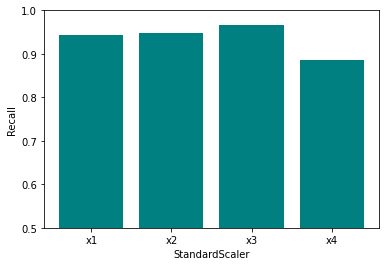

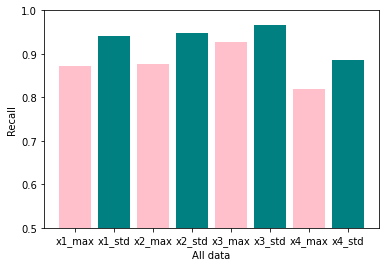

In [365]:
standardPloting(poly_recall,['pink','teal'],'Recall',[0.5,1])

In [366]:
for i in range(size) :
  print(poly_classification[i])

              precision    recall  f1-score   support

           0       0.72      0.50      0.59       816
           1       0.72      0.87      0.79      1230

    accuracy                           0.72      2046
   macro avg       0.72      0.69      0.69      2046
weighted avg       0.72      0.72      0.71      2046

              precision    recall  f1-score   support

           0       0.79      0.32      0.46       816
           1       0.68      0.94      0.79      1230

    accuracy                           0.70      2046
   macro avg       0.73      0.63      0.62      2046
weighted avg       0.72      0.70      0.66      2046

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       816
           1       0.74      0.88      0.80      1230

    accuracy                           0.74      2046
   macro avg       0.74      0.70      0.71      2046
weighted avg       0.74      0.74      0.73      2046

              preci

In [367]:
rbf_acc=[0,0,0,0,0,0,0,0]
rbf_prec=[0,0,0,0,0,0,0,0]
rbf_recall=[0,0,0,0,0,0,0,0]
rbf_classification=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='rbf')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  rbf_acc[i]=metrics.accuracy_score(y_test[i], y_pred)
  rbf_prec[i]=metrics.precision_score(y_test[i], y_pred)
  rbf_recall[i]=metrics.recall_score(y_test[i], y_pred)
  rbf_classification[i]=metrics.classification_report(y_test[i], y_pred)

In [368]:
print(rbf_acc)

[0.717008797653959, 0.7130987292277615, 0.727761485826002, 0.7150537634408602, 0.64613880742913, 0.6383186705767351, 0.7008797653958945, 0.6989247311827957]


In [369]:
print(rbf_prec)

[0.7206779661016949, 0.7179661016949153, 0.7312714776632302, 0.7199184228416043, 0.6522262334536703, 0.6460071513706794, 0.7079407806191117, 0.7074324324324325]


In [370]:
print(rbf_recall)

[0.8642276422764228, 0.8609756097560975, 0.865040650406504, 0.8609756097560975, 0.8813008130081301, 0.8813008130081301, 0.8552845528455284, 0.8512195121951219]


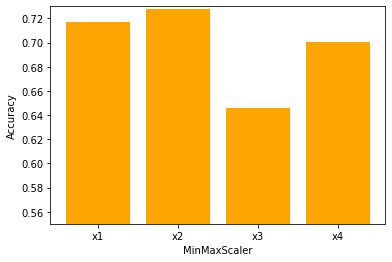

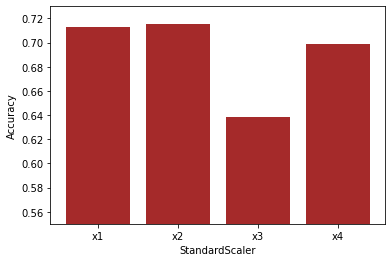

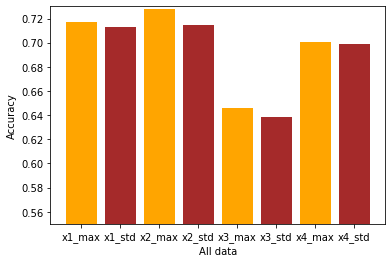

In [371]:
standardPloting(rbf_acc,['orange','brown'],'Accuracy',[0.55,0.73])

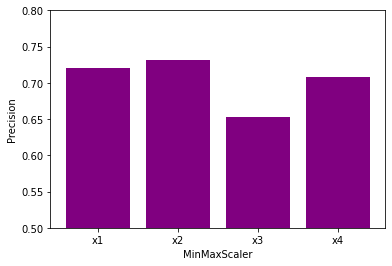

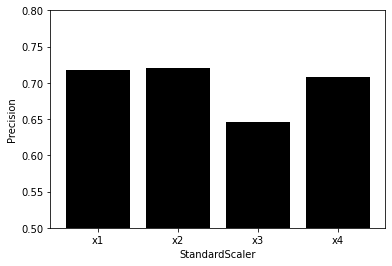

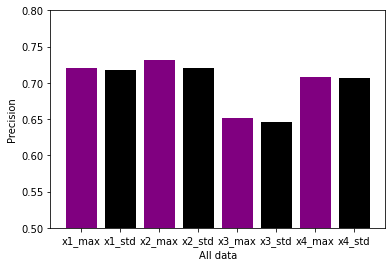

In [372]:
standardPloting(rbf_prec,['purple','black'],'Precision',[0.5,0.8])

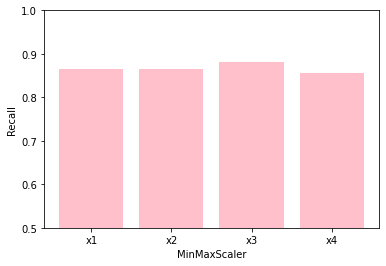

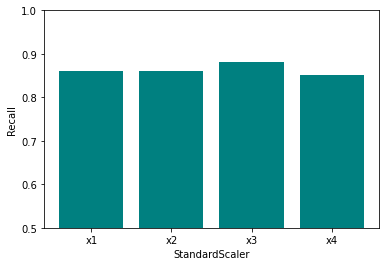

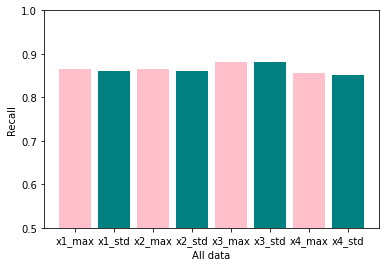

In [373]:
standardPloting(rbf_recall,['pink','teal'],'Recall',[0.5,1])

In [374]:
for i in range(size) :
  print(rbf_classification[i])

              precision    recall  f1-score   support

           0       0.71      0.50      0.58       816
           1       0.72      0.86      0.79      1230

    accuracy                           0.72      2046
   macro avg       0.71      0.68      0.68      2046
weighted avg       0.72      0.72      0.70      2046

              precision    recall  f1-score   support

           0       0.70      0.49      0.58       816
           1       0.72      0.86      0.78      1230

    accuracy                           0.71      2046
   macro avg       0.71      0.68      0.68      2046
weighted avg       0.71      0.71      0.70      2046

              precision    recall  f1-score   support

           0       0.72      0.52      0.60       816
           1       0.73      0.87      0.79      1230

    accuracy                           0.73      2046
   macro avg       0.73      0.69      0.70      2046
weighted avg       0.73      0.73      0.72      2046

              preci

# Year Prediction

In [703]:
year_select=2018

In [704]:
data1=data.loc[(data['SEASON']==year_select)]
data2=data.loc[(data['SEASON']>(year_select-5))&(data['SEASON']<year_select)]  

In [705]:
x1_test=data1[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]
x3_test=data1[['H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
             'A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]
x5_test=data1[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]
x7_test=data1[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]
y=data1['HOME_TEAM_WINS']
x1_test=x1_test.to_numpy()
x3_test=x3_test.to_numpy()
x5_test=x5_test.to_numpy()
x7_test=x7_test.to_numpy()
y=y.to_numpy()
scaler=MinMaxScaler()
scaler2=StandardScaler()
x2_test=x1_test
x1_test=scaler.fit_transform(x1_test)
x2_test=scaler2.fit_transform(x2_test)
x4_test=x3_test
scaler=MinMaxScaler()
scaler2=StandardScaler()
x3_test= scaler.fit_transform(x3_test)
x4_test = scaler2.fit_transform(x4_test)
x6_test=x5_test
scaler=MinMaxScaler()
scaler2=StandardScaler()
x5_test= scaler.fit_transform(x5_test)
x6_test = scaler2.fit_transform(x6_test)
x8_test=x7_test
scaler=MinMaxScaler()
scaler2=StandardScaler()
x7_test = scaler.fit_transform(x7_test)
x8_test = scaler2.fit_transform(x8_test)
y1_test=y
y2_test=y
y3_test=y
y4_test=y
y5_test=y
y6_test=y
y7_test=y
y8_test=y

In [706]:
x1_train=data2[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_TS','H_S_WP','H_S_WL','H_S_FG3_PCT','H_S_FTR',
               'H_L5_PTS','H_L5_PTS_A','H_L5_NET_RATING',
               'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_TS','A_S_WP','A_S_WL','A_S_FG3_PCT','A_S_FTR',
               'A_L5_PTS','A_L5_PTS_A','A_L5_NET_RATING']]
x3_train=data2[['H_S_WP','H_S_WL','H_S_NET_RATING','H_S_TS','H_S_TS_A','H_S_EFG','H_S_EFG_A','H_S_PTS','H_S_PTS_A','H_S_AST','H_S_REB','H_S_AST_A','H_S_REB_A','H_S_FTR',
              'A_S_WP','A_S_WL','A_S_NET_RATING','A_S_TS','A_S_TS_A','A_S_EFG','A_S_EFG_A','A_S_PTS','A_S_PTS_A','A_S_AST','A_S_REB','A_S_AST_A','A_S_REB_A','A_S_FTR']]
x5_train=data2[['H_L5_WP','H_L5_NET_RATING','H_L5_TS','H_L5_TS_A','H_L5_PTS','H_L5_PTS_A','H_L5_AST','H_L5_REB','H_L5_AST_A',
              'A_L5_WP','A_L5_NET_RATING','A_L5_TS','A_L5_TS_A','A_L5_PTS','A_L5_PTS_A','A_L5_AST','A_L5_REB','A_L5_AST_A']]
x7_train=data2[['H_S_NET_RATING','H_S_PTS','H_S_PTS_A','H_S_WP','H_S_WL','H_S_AST','H_S_REB','H_S_OREB','H_S_TS','H_S_STL','H_S_BLK','H_S_AST_A','H_S_REB_A','H_S_OREB_A','H_S_TS_A','H_S_FTR',
              'A_S_NET_RATING','A_S_PTS','A_S_PTS_A','A_S_WP','A_S_WL','A_S_AST','A_S_REB','H_S_OREB','A_S_TS','A_S_STL','A_S_BLK','A_S_AST_A','A_S_REB_A','A_S_OREB_A','A_S_TS_A','A_S_FTR',
              'H_L5_NET_RATING','H_L5_PTS','H_L5_PTS_A','H_L5_WP','H_L5_AST','H_L5_REB','H_L5_OREB','H_L5_TS','H_L5_STL','H_L5_BLK','H_L5_AST_A','H_L5_REB_A','H_L5_OREB_A','H_L5_TS_A','H_L5_FTR',
              'A_L5_NET_RATING','A_L5_PTS','A_L5_PTS_A','A_L5_WP','A_L5_AST','A_L5_REB','A_L5_OREB','A_L5_TS','A_L5_STL','A_L5_BLK','A_L5_AST_A','A_L5_REB_A','A_L5_OREB_A','A_L5_TS_A','A_L5_FTR']]
y=data2['HOME_TEAM_WINS']
x1_train=x1_train.to_numpy()
x3_train=x3_train.to_numpy()
x5_train=x5_train.to_numpy()
x7_train=x7_train.to_numpy()
y=y.to_numpy()
scaler=MinMaxScaler()
scaler2=StandardScaler()
x2_train=x1_train
x1_train=scaler.fit_transform(x1_train)
x2_train=scaler2.fit_transform(x2_train)
x4_train=x3_train
scaler=MinMaxScaler()
scaler2=StandardScaler()
x3_train= scaler.fit_transform(x3_train)
x4_train = scaler2.fit_transform(x4_train)
x6_train=x5_train
scaler=MinMaxScaler()
scaler2=StandardScaler()
x5_train= scaler.fit_transform(x5_train)
x6_train = scaler2.fit_transform(x6_train)
x8_train=x7_train
scaler=MinMaxScaler()
scaler2=StandardScaler()
x7_train = scaler.fit_transform(x7_train)
x8_train = scaler2.fit_transform(x8_train)
y1_train=y
y2_train=y
y3_train=y
y4_train=y
y5_train=y
y6_train=y
y7_train=y
y8_train=y

In [707]:
x_train=[x1_train,x2_train,x3_train,x4_train,x5_train,x6_train,x7_train,x8_train]
x_test=[x1_test,x2_test,x3_test,x4_test,x5_test,x6_test,x7_test,x8_test]
y_train=[y1_train,y2_train,y3_train,y4_train,y5_train,y6_train,y7_train,y8_train]
y_test=[y1_test,y2_test,y3_test,y4_test,y5_test,y6_test,y7_test,y8_test]
size=8

In [708]:
rbf_acc_year=[0,0,0,0,0,0,0,0]
rbf_prec_year=[0,0,0,0,0,0,0,0]
rbf_recall_year=[0,0,0,0,0,0,0,0]
rbf_classification_year=['','','','','','','','']
for i in range(size):
  clf = svm.SVC(kernel='rbf')
  clf.fit(x_train[i], y_train[i])
  y_pred = clf.predict(x_test[i])
  rbf_acc_year[i]=metrics.accuracy_score(y_test[i], y_pred)
  rbf_prec_year[i]=metrics.precision_score(y_test[i], y_pred)
  rbf_recall_year[i]=metrics.recall_score(y_test[i], y_pred)
  rbf_classification_year[i]=metrics.classification_report(y_test[i], y_pred)

In [711]:
print(rbf_acc_year) #2018

[0.6373456790123457, 0.6689814814814815, 0.6574074074074074, 0.6820987654320988, 0.6157407407407407, 0.6273148148148148, 0.6527777777777778, 0.6643518518518519]


In [712]:
print(rbf_prec_year) #2018

[0.6289473684210526, 0.6830601092896175, 0.6428571428571429, 0.6973094170403588, 0.6521739130434783, 0.638423645320197, 0.6451016635859519, 0.6833890746934225]


In [713]:
print(rbf_recall_year) #2018

[0.9384816753926701, 0.8180628272251309, 0.9424083769633508, 0.8141361256544503, 0.7460732984293194, 0.8481675392670157, 0.9136125654450262, 0.8023560209424084]


In [700]:
print(rbf_acc_year) #2017

[0.5871913580246914, 0.6774691358024691, 0.5871913580246914, 0.6774691358024691, 0.6057098765432098, 0.6257716049382716, 0.5995370370370371, 0.6705246913580247]


In [701]:
print(rbf_prec_year) #2017

[0.5876851130163678, 0.6904231625835189, 0.5870069605568445, 0.687089715536105, 0.5996797437950361, 0.6381909547738693, 0.5960159362549801, 0.6864501679731243]


In [702]:
print(rbf_recall_year) #2017

[0.9921052631578947, 0.8157894736842105, 0.9986842105263158, 0.8263157894736842, 0.9855263157894737, 0.8355263157894737, 0.9842105263157894, 0.8065789473684211]


In [688]:
print(rbf_acc_year) #2016

[0.665893271461717, 0.671307037896365, 0.6558391337973705, 0.6751740139211136, 0.5916473317865429, 0.6125290023201856, 0.6411446249033256, 0.6635730858468677]


In [689]:
print(rbf_prec_year) #2016

[0.6949152542372882, 0.681367144432194, 0.6537313432835821, 0.6835164835164835, 0.6058052434456929, 0.6261216350947159, 0.6458752515090543, 0.6743169398907104]


In [690]:
print(rbf_recall_year) #2016

[0.7612732095490716, 0.8196286472148541, 0.8713527851458885, 0.8249336870026526, 0.8580901856763926, 0.8328912466843501, 0.8514588859416445, 0.8183023872679045]


In [672]:
print(rbf_acc_year) #2015

[0.6297151655119323, 0.7036181678214011, 0.6204772902232486, 0.7120862201693611, 0.6351039260969977, 0.6235565819861432, 0.6682063125481139, 0.6951501154734411]


In [673]:
print(rbf_prec_year) #2015

[0.7487266553480475, 0.718785151856018, 0.7696737044145874, 0.7232142857142857, 0.6417769376181475, 0.6426426426426426, 0.7496360989810772, 0.7086092715231788]


In [674]:
print(rbf_recall_year) #2015

[0.5697674418604651, 0.8255813953488372, 0.5180878552971576, 0.8372093023255814, 0.8772609819121447, 0.8294573643410853, 0.665374677002584, 0.8294573643410853]


In [662]:
print(rbf_acc_year) #2014

[0.6599690880989181, 0.6978361669242659, 0.6367851622874807, 0.6761978361669243, 0.6190108191653787, 0.6406491499227203, 0.6089644513137558, 0.6800618238021638]


In [663]:
print(rbf_prec_year) #2014

[0.6381039197812215, 0.6946902654867256, 0.6173688736027515, 0.671247357293869, 0.6188212927756654, 0.6415478615071283, 0.5962632006498781, 0.6766917293233082]


In [664]:
print(rbf_recall_year) #2014

[0.9421265141318977, 0.845222072678331, 0.9663526244952894, 0.8546433378196501, 0.8761776581426649, 0.847913862718708, 0.9878869448183042, 0.847913862718708]


In [653]:
print(rbf_acc_year) #2013

[0.6136712749615976, 0.6820276497695853, 0.6075268817204301, 0.6705069124423964, 0.5998463901689708, 0.6321044546850998, 0.6221198156682027, 0.6705069124423964]


In [654]:
print(rbf_prec_year) #2013

[0.6019900497512438, 0.6780021253985122, 0.5959677419354839, 0.6687763713080169, 0.5967741935483871, 0.6285714285714286, 0.6077116512992456, 0.6642710472279261]


In [655]:
print(rbf_recall_year) #2013

[0.9692923898531375, 0.8518024032042724, 0.986648865153538, 0.8464619492656876, 0.9385847797062751, 0.8811748998664887, 0.9679572763684913, 0.8638184245660881]


In [645]:
print(rbf_acc_year) #2012

[0.6947449768160742, 0.6993817619783617, 0.6831530139103554, 0.69629057187017, 0.651468315301391, 0.6476043276661515, 0.6707882534775889, 0.6777434312210201]


In [644]:
print(rbf_prec_year) #2012

[0.7038934426229508, 0.7181425485961123, 0.6901688182720953, 0.7136752136752137, 0.6524064171122995, 0.6615532118887824, 0.6786757546251218, 0.6991525423728814]


In [643]:
print(rbf_recall_year) #2012

[0.8663303909205549, 0.8385876418663304, 0.8764186633039092, 0.8423707440100883, 0.9230769230769231, 0.8701134930643127, 0.8789407313997478, 0.832282471626734]


In [632]:
print(rbf_acc_year) #2011

[0.6202651515151515, 0.6695075757575758, 0.5909090909090909, 0.6761363636363636, 0.6079545454545454, 0.6354166666666666, 0.646780303030303, 0.6628787878787878]


In [633]:
print(rbf_prec_year) #2011

[0.7873417721518987, 0.681877444589309, 0.7832369942196532, 0.6847545219638242, 0.6601796407185628, 0.6431095406360424, 0.7534791252485089, 0.6752577319587629]


In [634]:
print(rbf_recall_year) #2011

[0.49522292993630573, 0.8328025477707006, 0.4315286624203822, 0.8439490445859873, 0.7022292993630573, 0.8694267515923567, 0.6035031847133758, 0.8343949044585988]


In [622]:
print(rbf_acc_year) #2010

[0.7078825347758887, 0.7001545595054096, 0.6908809891808346, 0.6955177743431221, 0.633693972179289, 0.652241112828439, 0.6854714064914992, 0.6808346213292118]


In [623]:
print(rbf_prec_year) #2010

[0.7369033760186263, 0.7118463180362861, 0.6938569989929506, 0.7104413347685683, 0.6384683882457702, 0.660594439117929, 0.6831395348837209, 0.6991434689507494]


In [624]:
print(rbf_recall_year) #2010

[0.8063694267515924, 0.8496815286624204, 0.8777070063694268, 0.8407643312101911, 0.913375796178344, 0.8777070063694268, 0.8980891719745223, 0.8318471337579618]
